# Credit Card Detection

Neste projeto iremos realizar detecção de fraudes em cartões de crédito. Os dados podem ser obtidos no dataset do kaggle: [Credit Card Fraud](https://www.kaggle.com/mlg-ulb/creditcardfraud)

# Importando dados e bibliotecas

## Importando principais bibliotecas e os dados

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
# Importando dados
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset["Time"] = dataset["Time"].apply(lambda x:(x/3600)%24)

## Balanceando os dados e amostragem estratificada

Aqui realizamos uma amostragem estratificada através do método SMOTE e em seguida balanceamos as classes.

A divisão de treino, teste e validação foi de 60%, 20% e 20%, respectivamente.

Realizaremos a reamostragem somente da classe minoritária e além disso a amostragem dos dados de treino e validação serão treinados separadamente nos objetos ``sm_train`` e ``sm_val`` derivados da classe ``SMOTE`` do pacote ``imblearn.over_sampling``.

In [3]:
from imblearn.over_sampling import SMOTE



# Armazenando em numpy array's os dados
X = dataset.values[:,:-1]
y = dataset.values[:,-1:]



# Número de exemplos
n_examples = len(y)


# Separando os dados de não-fraude e os de fraude
# nf significa não-fraude
X_nf = X[y.reshape(-1) == 0,:]
y_nf = y[y.ravel() == 0]
n_examples_nf = len(y_nf)

# Embaralhando os dados
np.random.seed(43)
index_shuffling_nf = list(range(n_examples_nf))
np.random.shuffle(index_shuffling_nf)
np.random.seed(None)

X_nf,y_nf = X_nf[index_shuffling_nf,:],y_nf[index_shuffling_nf,:]


# Definindo os tamanhos dos dados de treino, teste e validação para não-fraude
# A divisão ficará 60%-20%-20%
train_size_nf = int(n_examples_nf*0.6)
val_size_nf = int(n_examples_nf*0.2)
test_size_nf = n_examples_nf - train_size_nf - val_size_nf


# Separando em dados de treino-teste-validação
X_nf_train,y_nf_train = X_nf[:train_size_nf],y_nf[:train_size_nf]
X_nf_val,y_nf_val = X_nf[train_size_nf:train_size_nf+val_size_nf],y_nf[train_size_nf:train_size_nf+val_size_nf]
X_nf_test,y_nf_test = X_nf[train_size_nf+val_size_nf:],y_nf[train_size_nf+val_size_nf:]




# Separando os dados de não-fraude e os de fraude
# f significa fraude
X_f = X[y.reshape(-1) == 1,:]
y_f = y[y.ravel() == 1]
n_examples_f = len(y_f)


# Embaralhando os dados
np.random.seed(42)
index_shuffling_f = list(range(n_examples_f))
np.random.shuffle(index_shuffling_f)
np.random.seed(None)

X_f,y_f = X_f[index_shuffling_f,:],y_f[index_shuffling_f,:]


# Definindo os tamanhos dos dados de treino, teste e validação para fraude
# A divisão ficará 60%-20%-20%
train_size_f = int(n_examples_f*0.6)
val_size_f = int(n_examples_f*0.2)
test_size_f = n_examples_f - train_size_f - val_size_f


# Separando em dados de treino-teste-validação
X_f_train,y_f_train = X_f[:train_size_f],y_f[:train_size_f]
X_f_val,y_f_val = X_f[train_size_f:train_size_f+val_size_f],y_f[train_size_f:train_size_f+val_size_f]
X_f_test,y_f_test = X_f[train_size_f+val_size_f:],y_f[train_size_f+val_size_f:]




# Concatenando os dados rebalanceados

X_train = np.concatenate((X_f_train,X_nf_train),axis=0)
y_train = np.concatenate((y_f_train,y_nf_train),axis=0)


X_val = np.concatenate((X_f_val,X_nf_val),axis=0)
y_val = np.concatenate((y_f_val,y_nf_val),axis=0)


X_test = np.concatenate((X_nf_test,X_f_test),axis=0)
y_test = np.concatenate((y_nf_test,y_f_test),axis=0)




# Rebalanceando os dados de treino e validação
sm_train = SMOTE(sampling_strategy='minority',random_state=42)
sm_val = SMOTE(sampling_strategy='minority',random_state=42)

X_train,y_train = sm_train.fit_resample(X_train,y_train)
X_val,y_val = sm_val.fit_resample(X_val,y_val)

# Definindo os tamanhos de treino, teste e validação novamente
train_size = len(y_train)
val_size = len(y_val)
test_size = len(y_test)
n_examples = train_size + val_size + test_size 

# Embaralhando novamente os dados de treino e validação
np.random.seed(101)
index_shuffling_train = list(range(train_size))
np.random.shuffle(index_shuffling_train)
np.random.seed(None)

X_train,y_train = X_train[index_shuffling_train],y_train[index_shuffling_train]


np.random.seed(101)
index_shuffling_val = list(range(val_size))
np.random.shuffle(index_shuffling_val)
np.random.seed(None)

X_val,y_val = X_val[index_shuffling_val],y_val[index_shuffling_val]


In [4]:
from sklearn.preprocessing import MinMaxScaler

# Mudança de escala para facilitar o treinamento
sc_y = MinMaxScaler()

X_train_sc = sc_y.fit_transform(X_train)
X_val_sc = sc_y.transform(X_val)
X_test_sc = sc_y.transform(X_test)

# Modelos de Classificação

Nesta primeira abordagem utilizaremos modelos simples para previsão de fraudes, escolhidos através de validação cruzada com escolha aleatória dos hiperparâmetros, com a classe ``RandomizedSearchCV()`` do ``sklearn.model_selection``.

Utilizamos a classe ``SGDClassifier`` do pacote ``sklearn`` para classificar os dados. Basicamente este modelo realiza a previsão das classe com classificadores lineares, treinando com métodos estocásticos. Esta classe possui os seguintes hiperparâmetros:

* ``alpha``: este é um parâmetro de regularização que controla o peso das penalidades. A distribuição utilizada na escolha aleatória deste hiperparâmetro é ``loguniform(1e-4,1e1)``.

* ``penalty``: este é um parâmetro de regularização que controla o tipo de penalidade. Os hiperparâmetros escolhidos uniformemente são ``('l1','l2')``.

* ``loss``: este é um parâmetro que controla o tipo de classificação. Aqui essencialmente utilizaremos dois parâmetros para definir modelos separados, que são os seguintes:

    * ``'hinge'``: este este tipo de *loss* define o modelo SVM estocástico. Ou seja, estamos de certa forma tentando maximizar a separação entre as classes, porém por ser estocástico tem a vantagem de possuir um treinamento mais rápido e também ser menos propenso à *overfitting*, pelo fato de que não utilizar todos os dados de treino ao mesmo tempo.

    * ``'log'``:este este tipo de *loss* define o modelo de regressão logística com treinamento estocástico. Neste caso o treinamento tenta deixar as distribuições de probabilidades preditas mais próximas aos valores reais.

In [5]:
# Save model
from joblib import dump
import json


# Distribuições
from scipy.stats import loguniform
from scipy.stats import uniform


# Modelos
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Barra de progresso
from tqdm import tqdm

# Seleção de modelos
from sklearn.model_selection import RandomizedSearchCV


# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})






# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print('\n' + s)
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({s + ' Test':{'CV_score':cv_score,
                      'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                      'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                       'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
    # Previsão dos dados de validação
    y_pred = best_model_.predict(X_val_sc)
    # Resultados dos dados de validação
    Results.update({s + ' Val':{'CV_score':cv_score,
                      'Precisão Balanceada':balanced_accuracy_score(y_val.reshape(-1),y_pred.reshape(-1)),
                      'Classification Report':classification_report(y_val.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                       'Matriz de Confusão':confusion_matrix(y_val.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)

  0%|          | 0/2 [00:00<?, ?it/s]


SGD SVM


 50%|█████     | 1/2 [00:53<00:53, 53.94s/it]


SGD LR


100%|██████████| 2/2 [01:45<00:00, 52.75s/it]


SGD SVM
Params: 
	alpha: 0.00010090061869151561		average: False		class_weight: None
	early_stopping: False		epsilon: 1.000e-01		eta0: 0.0
	fit_intercept: True		l1_ratio: 1.500e-01		learning_rate: optimal
	loss: hinge		max_iter: 1000		n_iter_no_change: 5
	n_jobs: None		penalty: l2		power_t: 0.5
	random_state: 42		shuffle: True		tol: 0.001
	validation_fraction: 1.000e-01		verbose: 0		warm_start: False

Val
Precisão Balanceada: 0.9736
CV_score: 0.9735
Classification Report: 


,precision,recall,f1-score,support
0.0,0.954701,0.994425,0.974158,56863.000000
1.0,0.994183,0.952816,0.973060,56863.000000
accuracy,0.973621,0.973621,0.973621,0.973621
macro avg,0.974442,0.973621,0.973609,113726.000000
weighted avg,0.974442,0.973621,0.973609,113726.000000


Matriz de Confusão: 


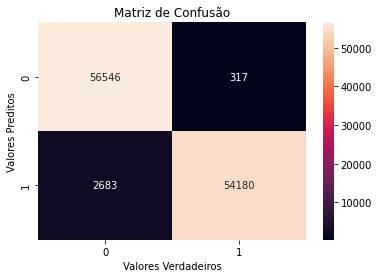

Test
Precisão Balanceada: 0.9318
CV_score: 0.9735
Classification Report: 


,precision,recall,f1-score,support
0.0,0.999770,0.995006,0.997382,56863.000000
1.0,0.232432,0.868687,0.366738,99.000000
accuracy,0.994786,0.994786,0.994786,0.994786
macro avg,0.616101,0.931846,0.682060,56962.000000
weighted avg,0.998437,0.994786,0.996286,56962.000000


Matriz de Confusão: 


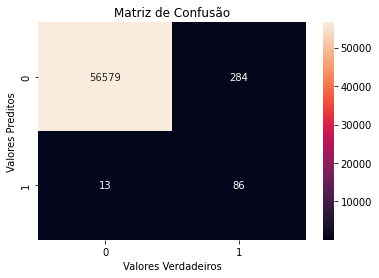

SGD LR
Params: 
	alpha: 0.00010090061869151561		average: False		class_weight: None
	early_stopping: False		epsilon: 1.000e-01		eta0: 0.0
	fit_intercept: True		l1_ratio: 1.500e-01		learning_rate: optimal
	loss: log		max_iter: 1000		n_iter_no_change: 5
	n_jobs: None		penalty: l2		power_t: 0.5
	random_state: 42		shuffle: True		tol: 0.001
	validation_fraction: 1.000e-01		verbose: 0		warm_start: False

Val
Precisão Balanceada: 0.9699
CV_score: 0.9697
Classification Report: 


,precision,recall,f1-score,support
0.0,0.947402,0.994953,0.970595,56863.000000
1.0,0.994686,0.944762,0.969081,56863.000000
accuracy,0.969857,0.969857,0.969857,0.969857
macro avg,0.971044,0.969857,0.969838,113726.000000
weighted avg,0.971044,0.969857,0.969838,113726.000000


Matriz de Confusão: 


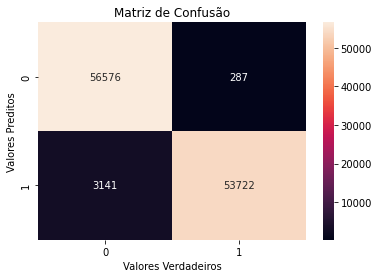

Test
Precisão Balanceada: 0.9322
CV_score: 0.9697
Classification Report: 


,precision,recall,f1-score,support
0.0,0.999770,0.995639,0.997700,56863.000000
1.0,0.257485,0.868687,0.397229,99.000000
accuracy,0.995418,0.995418,0.995418,0.995418
macro avg,0.628628,0.932163,0.697464,56962.000000
weighted avg,0.998480,0.995418,0.996657,56962.000000


Matriz de Confusão: 


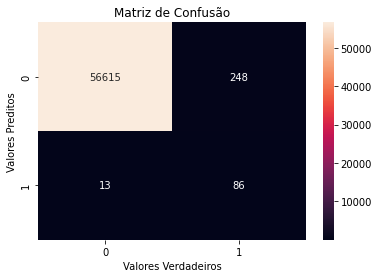

In [6]:
for model in models.keys():
    print(model)
    # Melhor modelo
    best_model_ = Best_model[model]


    # Apresentando os hiperparâmetros
    params_ = best_model_.get_params()
    print('Params: ')
    string_params = ''
    for i,key in enumerate(params_.keys()):
      param = params_[key]
      if (i+1)%3>0:
        string = ': {0}\t'.format(param)
        if type(param) == float:
          string = ': {0:1.3e}\t'.format(param)
        string_params = string_params + '\t' + key + string
      else:
        string_params = string_params + '\t' + key +': {0}\n'.format(param)
    print(string_params)

    # Apresentando o desempenho nos dados de validação e teste
    val_test = (' Val',' Test')
    for sufix in val_test:
      print(sufix[1:])
      results_dict = Results[model + sufix]
      print('Precisão Balanceada: %1.4f'%(results_dict['Precisão Balanceada']))
      print('CV_score: %1.4f'%(results_dict['CV_score']))
      print('Classification Report: ')
      display(pd.DataFrame(results_dict['Classification Report']).T)
      print('Matriz de Confusão: ')
      fig = plt.figure()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d')
      ax = plt.gca()
      ax.set_title('Matriz de Confusão')
      ax.set_xlabel('Valores Verdadeiros')
      ax.set_ylabel('Valores Preditos')
      plt.show()

# Selecionando Variáveis

Podemos ver que nos dados de validação e teste o modelo SVM teve o melhor desempenho. Portanto utilizaremos este modelo para selecionar as melhores variáveis através do Forward Selection.

In [7]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

best_model_ = Best_model['SGD SVM']


# Selecionando as melhores variáveis
# Forward Selection
sfs1 = sfs(best_model_,k_features=12,forward=True,verbose=18,scoring='balanced_accuracy',n_jobs=-1)
X_train_sc_features = sfs1.fit_transform(X_train_sc,y_train.ravel())
X_test_sc_features = sfs1.transform(X_test_sc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

In [8]:
# Performance (cross-validation) for each number of features
feature_selection = pd.DataFrame(sfs1.subsets_).T
feature_selection

,feature_idx,cv_scores,avg_score,feature_names
1,"(14,)","[0.9446772964417609, 0.9457617679817105, 0.945...",0.944964,"(14,)"
2,"(4, 14)","[0.957134064130371, 0.9586581862946245, 0.9592...",0.958227,"(4, 14)"
3,"(4, 12, 14)","[0.9632598628290052, 0.9646520898059675, 0.964...",0.964051,"(4, 12, 14)"
4,"(4, 12, 14, 16)","[0.9653115657424234, 0.9669822381147781, 0.966...",0.966402,"(4, 12, 14, 16)"
5,"(4, 10, 12, 14, 16)","[0.9673486136350313, 0.9681692948003986, 0.968...",0.967911,"(4, 10, 12, 14, 16)"
6,"(4, 10, 12, 14, 16, 17)","[0.9678468843425758, 0.9703528929011079, 0.970...",0.969517,"(4, 10, 12, 14, 16, 17)"
7,"(4, 10, 11, 12, 14, 16, 17)","[0.9703235828594876, 0.9709537487543232, 0.970...",0.970672,"(4, 10, 11, 12, 14, 16, 17)"
8,"(4, 8, 10, 11, 12, 14, 16, 17)","[0.97058737323407, 0.9721261504191336, 0.97203...",0.971513,"(4, 8, 10, 11, 12, 14, 16, 17)"
9,"(4, 8, 10, 11, 12, 13, 14, 16, 17)","[0.9718330500029311, 0.9734597573128554, 0.973...",0.972475,"(4, 8, 10, 11, 12, 13, 14, 16, 17)"
10,"(4, 8, 9, 10, 11, 12, 13, 14, 16, 17)","[0.972052875315083, 0.9740019930828302, 0.9733...",0.973017,"(4, 8, 9, 10, 11, 12, 13, 14, 16, 17)"


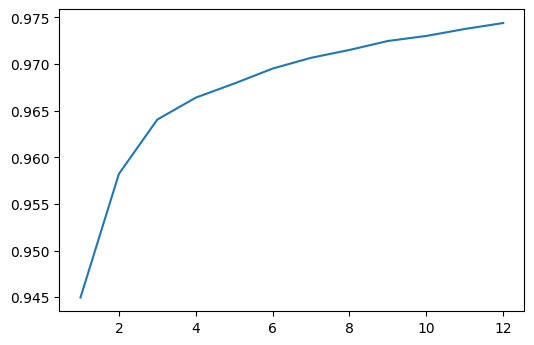

In [9]:
# Features plot cross-validation average score
fig = plt.figure(dpi = 100)
plt.plot(feature_selection['avg_score'])
plt.show()

In [10]:
feature_selection['avg_score'] = feature_selection['avg_score'].astype(float)
feature_selection['avg_score']

1     0.944964
2     0.958227
3     0.964051
4     0.966402
5     0.967911
6     0.969517
7     0.970672
8     0.971513
9     0.972475
10    0.973017
11    0.973761
12    0.974403
Name: avg_score, dtype: float64

In [11]:
features_selected = [4, 12, 14]
feature_names = list(dataset.columns[features_selected])


X_train_features = X_train[:,features_selected]
X_val_features = X_val[:,features_selected]
X_test_features = X_test[:,features_selected]


X_train_sc_features = X_train_sc[:,features_selected]
X_val_sc_features = X_val_sc[:,features_selected]
X_test_sc_features = X_test_sc[:,features_selected]

print('Selected Features:')
print_string = ''
for x in feature_names:
  print_string += x + '\n'
print(print_string)

Selected Features:
V4
V12
V14



In [12]:
# Save model
from joblib import dump
import json


# Distribuições
from scipy.stats import loguniform


# Modelos
from sklearn.linear_model import SGDClassifier

# Métricas
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Barra de progresso
from tqdm import tqdm

# Seleção de modelos
from sklearn.model_selection import RandomizedSearchCV


# Espaço das distribuições de parâmetros
space = {}

# Modelos utilizados
models = {}


sgd = SGDClassifier

# Distribuição SVM
distributions = dict(loss=('hinge',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD SVM':distributions})

models.update({'SGD SVM':sgd})




# Distribuição Logistica
distributions = dict(loss=('log',),alpha=loguniform(1e-4,1e1),penalty=('l1','l2'),random_state=(42,))

space.update({'SGD LR':distributions})

models.update({'SGD LR':sgd})









# Nomes dos classificadores
classifiers_names = list(models.keys())




# Dicionarios de modelos, resultados e parâmetros
Best_model = {}
Results = {}
Best_params = {}


np.random.seed(42)
############ Model Loop ################
for s in tqdm(classifiers_names):
    print(s)
    # Classificador
    clf = models[s]
    # RandomizedSearchCV
    randomized_search = RandomizedSearchCV(clf(),param_distributions=space[s],n_iter=15,random_state=42,scoring='balanced_accuracy')
    # Encontrando os melhores parâmetros
    randomized_search.fit(X_train_sc_features,y_train.ravel())
    # Melhor desempenho na validação cruzada
    cv_score = randomized_search.best_score_
    # Melhores hiperparâmetros (segundo a validação cruzada)
    best_params = randomized_search.best_params_
    Best_params.update({s:best_params})
    # Melhor classificador (segundo a validação cruzada)
    best_model_ = randomized_search.best_estimator_
    # Previsão dos dados de teste
    y_pred = best_model_.predict(X_test_sc_features)
    Best_model.update({s:best_model_})
    # Resultados dos dados de teste
    Results.update({s + ' Test':{'CV_score':cv_score,
                      'Precisão Balanceada':balanced_accuracy_score(y_test.reshape(-1),y_pred.reshape(-1)),
                      'Classification Report':classification_report(y_test.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                       'Matriz de Confusão':confusion_matrix(y_test.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
    # Previsão dos dados de validação
    y_pred = best_model_.predict(X_val_sc_features)
    # Resultados dos dados de validação
    Results.update({s + ' Val':{'CV_score':cv_score,
                      'Precisão Balanceada':balanced_accuracy_score(y_val.reshape(-1),y_pred.reshape(-1)),
                      'Classification Report':classification_report(y_val.reshape(-1),y_pred.reshape(-1),digits=4,output_dict=True),
                       'Matriz de Confusão':confusion_matrix(y_val.reshape(-1),y_pred.reshape(-1),labels=[0.,1.]).tolist()}})
np.random.seed(None)

  0%|          | 0/2 [00:00<?, ?it/s]

SGD SVM


 50%|█████     | 1/2 [00:31<00:31, 31.03s/it]

SGD LR


100%|██████████| 2/2 [01:02<00:00, 31.03s/it]


SGD SVM
Params: 
	alpha: 0.00010090061869151561		average: False		class_weight: None
	early_stopping: False		epsilon: 1.000e-01		eta0: 0.0
	fit_intercept: True		l1_ratio: 1.500e-01		learning_rate: optimal
	loss: hinge		max_iter: 1000		n_iter_no_change: 5
	n_jobs: None		penalty: l2		power_t: 0.5
	random_state: 42		shuffle: True		tol: 0.001
	validation_fraction: 1.000e-01		verbose: 0		warm_start: False

Val
Precisão Balanceada: 0.9717
CV_score: 0.9641
Classification Report: 


,precision,recall,f1-score,support
0.0,0.955829,0.989044,0.972153,56863.000000
1.0,0.988649,0.954294,0.971168,56863.000000
accuracy,0.971669,0.971669,0.971669,0.971669
macro avg,0.972239,0.971669,0.971660,113726.000000
weighted avg,0.972239,0.971669,0.971660,113726.000000


Matriz de Confusão: 


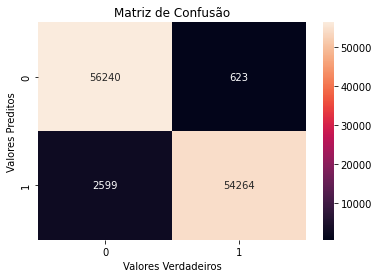

Test
Precisão Balanceada: 0.9289
CV_score: 0.9641
Classification Report: 


,precision,recall,f1-score,support
0.0,0.999769,0.989149,0.994431,56863.00000
1.0,0.122333,0.868687,0.214464,99.00000
accuracy,0.988940,0.988940,0.988940,0.98894
macro avg,0.561051,0.928918,0.604447,56962.00000
weighted avg,0.998244,0.988940,0.993075,56962.00000


Matriz de Confusão: 


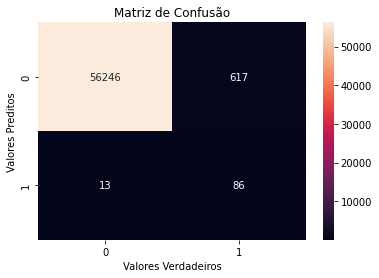

SGD LR
Params: 
	alpha: 0.00010090061869151561		average: False		class_weight: None
	early_stopping: False		epsilon: 1.000e-01		eta0: 0.0
	fit_intercept: True		l1_ratio: 1.500e-01		learning_rate: optimal
	loss: log		max_iter: 1000		n_iter_no_change: 5
	n_jobs: None		penalty: l2		power_t: 0.5
	random_state: 42		shuffle: True		tol: 0.001
	validation_fraction: 1.000e-01		verbose: 0		warm_start: False

Val
Precisão Balanceada: 0.9697
CV_score: 0.9617
Classification Report: 


,precision,recall,f1-score,support
0.0,0.951603,0.989642,0.970250,56863.000000
1.0,0.989210,0.949669,0.969036,56863.000000
accuracy,0.969655,0.969655,0.969655,0.969655
macro avg,0.970407,0.969655,0.969643,113726.000000
weighted avg,0.970407,0.969655,0.969643,113726.000000


Matriz de Confusão: 


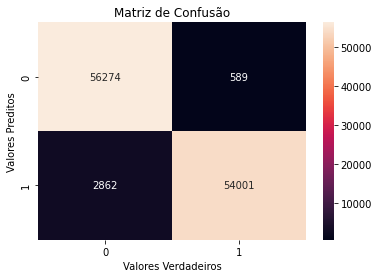

Test
Precisão Balanceada: 0.9291
CV_score: 0.9617
Classification Report: 


,precision,recall,f1-score,support
0.0,0.999769,0.989519,0.994617,56863.000000
1.0,0.126100,0.868687,0.220230,99.000000
accuracy,0.989309,0.989309,0.989309,0.989309
macro avg,0.562934,0.929103,0.607424,56962.000000
weighted avg,0.998251,0.989309,0.993272,56962.000000


Matriz de Confusão: 


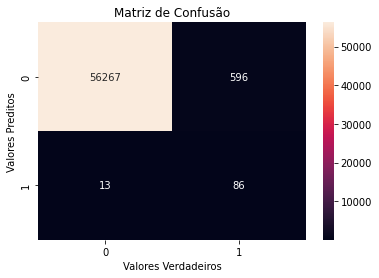

In [13]:
for model in models.keys():
    print(model)
    # Melhor modelo
    best_model_ = Best_model[model]


    # Apresentando os hiperparâmetros
    params_ = best_model_.get_params()
    print('Params: ')
    string_params = ''
    for i,key in enumerate(params_.keys()):
      param = params_[key]
      if (i+1)%3>0:
        string = ': {0}\t'.format(param)
        if type(param) == float:
          string = ': {0:1.3e}\t'.format(param)
        string_params = string_params + '\t' + key + string
      else:
        string_params = string_params + '\t' + key +': {0}\n'.format(param)
    print(string_params)

    # Apresentando o desempenho nos dados de validação e teste
    val_test = (' Val',' Test')
    for sufix in val_test:
      print(sufix[1:])
      results_dict = Results[model + sufix]
      print('Precisão Balanceada: %1.4f'%(results_dict['Precisão Balanceada']))
      print('CV_score: %1.4f'%(results_dict['CV_score']))
      print('Classification Report: ')
      display(pd.DataFrame(results_dict['Classification Report']).T)
      print('Matriz de Confusão: ')
      fig = plt.figure()
      sns.heatmap(np.array(results_dict['Matriz de Confusão']),annot=True,fmt='d')
      ax = plt.gca()
      ax.set_title('Matriz de Confusão')
      ax.set_xlabel('Valores Verdadeiros')
      ax.set_ylabel('Valores Preditos')
      plt.show()

A partir destes resultados vemos bom desempenho da regressão logística e do SVM, que apesar de bastante simples, ainda geraram bons resultados, equilibrando bem o recall tanto da classe não-fraude quanto da classe fraude.

Além disso, o modelo SVM teve uma leve melhora no recall de ambas as classes, que é o principal objetivo. Ou seja, aumentar o número de fraudes corretamente classificadas, porém sem comprometer muito os casos em que não há fraude.

Vamos calibrar o limiar da regressão logística para verificar se podemos melhorar ainda mais essa precisão. Não podemos realizar o mesmo procedimento para o SVM porque este não possui uma boa estimativa de probabilidades.

In [14]:
best_model = Best_model['SGD LR']

In [15]:
val_prob = best_model.predict_proba(X_val_sc_features)
val_prob = val_prob[:,1]

test_prob = best_model.predict_proba(X_test_sc_features)
test_prob = test_prob[:,1]

## Testando diferentes limiares (thresholds)

Definindo alguns testes e decidindo o melhor limiar (threshold) para prever as classes.

Referências: 

[A Gentle Introduction to Threshold-Moving for Imbalanced Classification](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

[Optimal Threshold for Imbalanced Classification](https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293)



### G-Mean

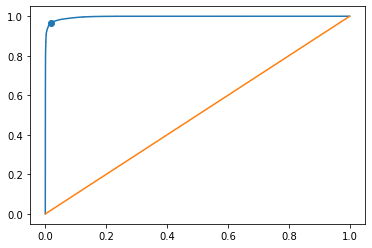

Best Threshold: 0.3726
Area Under the Curve: 0.9970


In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

# Taxa de verdadeiros negativos = 1-fpr (1-(taxa de falsos positivos))
j_max = np.sqrt(tpr*(1-fpr)).argmax()
threshold = thresholds[j_max]

# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter((fpr[j_max]),tpr[j_max])
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [17]:
y_val_pred_gmean = (val_prob>=threshold)


y_test_pred_gmean = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.9700 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.967917,0.980479,0.974158,56863.00000
1.0,0.980223,0.967501,0.973820,56863.00000
accuracy,0.973990,0.973990,0.973990,0.97399
macro avg,0.974070,0.973990,0.973989,113726.00000
weighted avg,0.974070,0.973990,0.973989,113726.00000


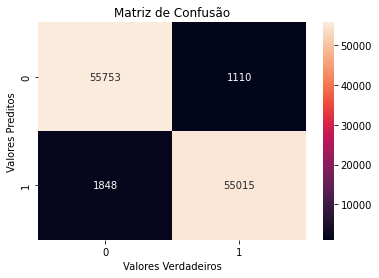

In [18]:
# Utilizando as métricas Fbeta, classification report e confusion matrix para verificar as precisão das previsões
print("**************Dados de Validação**************\n")
beta = 2

print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.2672 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999785,0.979864,0.989724,56863.000000
1.0,0.070617,0.878788,0.130729,99.000000
accuracy,0.979688,0.979688,0.979688,0.979688
macro avg,0.535201,0.929326,0.560226,56962.000000
weighted avg,0.998170,0.979688,0.988231,56962.000000


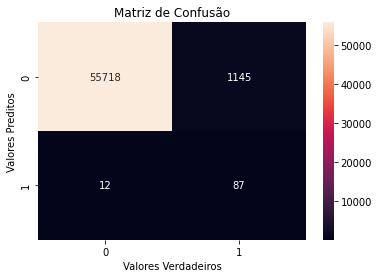

In [19]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_gmean,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_gmean,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

### $F_{\beta}$

O método $F_{\beta}$ encontra a limiar maximizando a quantidade $F_{\beta}$.

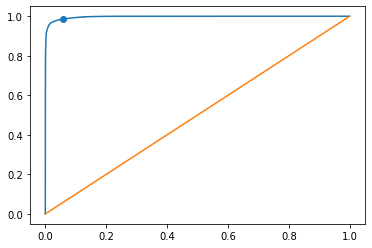

Best Threshold: 0.2124
Area Under the Curve: 0.9970


In [20]:
from sklearn.metrics import recall_score

# Utilizando a ROC curve para encontrar os fpr (taxa de falsos positivos)
# e os tpr (taxa de verdadeiros positivos)
fpr, tpr, thresholds = roc_curve(y_val,val_prob)
x = [0,1]

n_thresholds = 50
np.random.seed(42)
random_thresholds = np.random.rand(n_thresholds)*(val_prob.max() - val_prob.min()) + val_prob.min()
np.random.seed(None)

# Neste caso vamos maximizar o f-beta com beta = 2
beta = 2
fbeta_scores = np.zeros((n_thresholds))
for j in range(n_thresholds):
  y_val_pred = (val_prob>=random_thresholds[j])
  fbeta_scores[j] = fbeta_score(y_val,y_val_pred,beta=beta)


# Encontrando o limiar com maior valor de fbeta
j_max = fbeta_scores.argmax()

threshold = random_thresholds[j_max]


y_val_pred = (val_prob>=threshold)
tpr_max = recall_score(y_val,y_val_pred)
fpr_max = 1 - recall_score(y_val,y_val_pred,pos_label=0)


# Verificando o ponto na curva ROC
plt.plot(fpr,tpr)
plt.plot(x,x)
plt.scatter(fpr_max,tpr_max)
plt.show()
print('Best Threshold: %1.4f'%threshold)
print('Area Under the Curve: %1.4f'%(np.diff(fpr)*tpr[1:]).sum())

In [21]:
y_val_pred_fbeta = (val_prob>=threshold)


y_test_pred_fbeta = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.9770 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.984642,0.942581,0.963153,56863.00000
1.0,0.944934,0.985298,0.964694,56863.00000
accuracy,0.963940,0.963940,0.963940,0.96394
macro avg,0.964788,0.963940,0.963923,113726.00000
weighted avg,0.964788,0.963940,0.963923,113726.00000


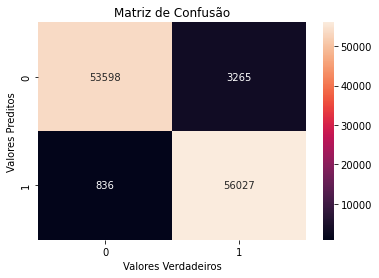

In [22]:
# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.1149 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999832,0.939680,0.968823,56863.000000
1.0,0.025568,0.909091,0.049737,99.000000
accuracy,0.939626,0.939626,0.939626,0.939626
macro avg,0.512700,0.924385,0.509280,56962.000000
weighted avg,0.998138,0.939626,0.967225,56962.000000


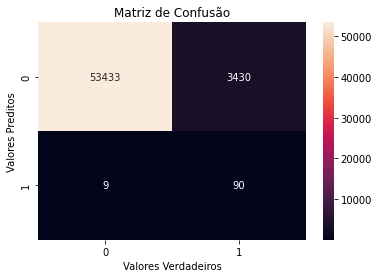

In [23]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_fbeta,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_fbeta,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

#### Percentil

Neste método calculamos o a percentil 95 das distâncias até o cluster nos dados de validação que não são fraude e predizemos como fraude os valores que se encontrar acima deste valor.

In [24]:
# Prevendo os scores de anomalia dos dados de validação (não fraudes)
val_prob_nf = best_model.predict_proba(X_val_sc_features[y_val==0,:])

threshold = np.quantile(val_prob_nf,.95)
print('Threshold: %1.4f'%threshold)

Threshold: 0.9791


In [25]:
# Realizando as previsões para o limiar encontrado
y_val_pred_std = (val_prob>=threshold)


y_test_pred_std = (test_prob>=threshold)

**************Dados de Validação**************

F-beta score: 0.7179 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.752210,0.999596,0.858435,56863.000000
1.0,0.999397,0.670717,0.802715,56863.000000
accuracy,0.835156,0.835156,0.835156,0.835156
macro avg,0.875804,0.835156,0.830575,113726.000000
weighted avg,0.875804,0.835156,0.830575,113726.000000


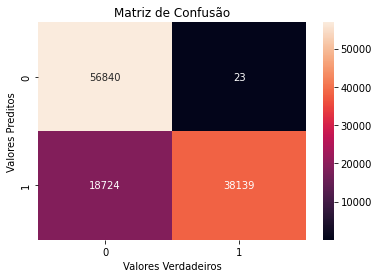

In [26]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Realizando as avaliações dos resultados obtidos
print("**************Dados de Validação**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_val.reshape(-1),y_val_pred_std,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_val.reshape(-1),y_val_pred_std,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_val.reshape(-1),y_val_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

**************Dados de Teste**************

F-beta score: 0.7143 	 beta = 2.00


,precision,recall,f1-score,support
0.0,0.999490,0.999578,0.999534,56863.00000
1.0,0.744681,0.707071,0.725389,99.00000
accuracy,0.999070,0.999070,0.999070,0.99907
macro avg,0.872085,0.853324,0.862461,56962.00000
weighted avg,0.999047,0.999070,0.999058,56962.00000


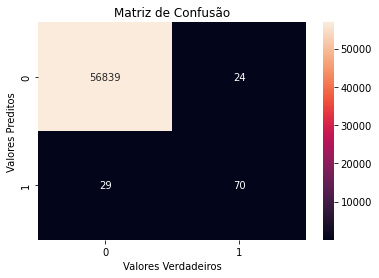

In [27]:
print("**************Dados de Teste**************\n")
beta = 2
print("F-beta score: %1.4f"%fbeta_score(y_test.reshape(-1),y_test_pred_std,beta=beta),'\t beta = %1.2f'%beta)

display(pd.DataFrame(classification_report(y_test.reshape(-1),y_test_pred_std,digits=2,output_dict=True)).T)

sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f')
ax = plt.gca()
ax.set_title('Matriz de Confusão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')
plt.show()

*************************   Dados de Teste   *************************


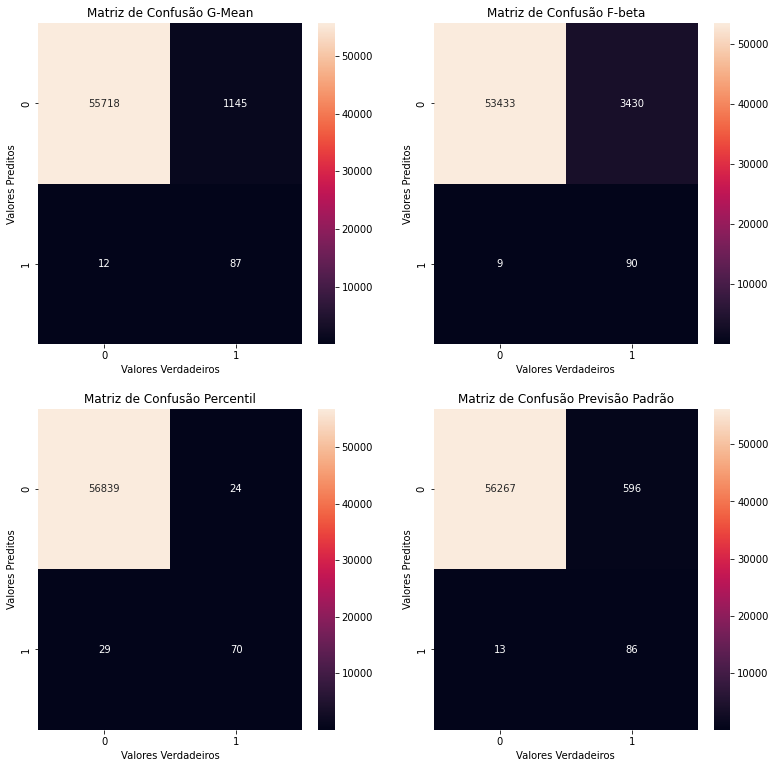

In [28]:
num_asterisk = 25
print("*"*num_asterisk + "   Dados de Teste   " + "*"*num_asterisk)


fig,axes = plt.subplots(2,2)
fig.set_size_inches(6.5*2,6.5*2)

axes = axes.ravel()

# G-mean
ax = axes[0]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_gmean,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax)
ax.set_title('Matriz de Confusão G-Mean')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')




# F-beta
ax = axes[1]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_fbeta,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax)
ax.set_title('Matriz de Confusão F-beta')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')



# Percentil
ax = axes[2]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred_std,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax)
ax.set_title('Matriz de Confusão Percentil')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')



y_test_pred = (test_prob>=0.5)


# Standard prediction
ax = axes[3]
sns.heatmap(confusion_matrix(y_test.reshape(-1),y_test_pred,labels=[0.,1.]),annot=True,fmt='1.0f',ax=ax)
ax.set_title('Matriz de Confusão Previsão Padrão')
ax.set_xlabel('Valores Verdadeiros')
ax.set_ylabel('Valores Preditos')

plt.show()

### Conclusões para os limiares

A escolha de limiares trouxe uma melhora pequena no número de fraudes detectadas, em troca de um número grande de falsos positivos. 

O melhor modelo nesse caso é o SVM.